In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 5]

import warnings
warnings.simplefilter(action='ignore')

In [280]:
#Read the training dataset
trainingData = pd.read_csv("./train.csv")

#Read the test dataset
testData = pd.read_csv("./test.csv")

In [281]:
#Exploring the dataset
trainingData.shape


(891, 12)

In [282]:
#Exploring the dataset
testData.shape

(418, 11)

In [283]:
#Exploring dataset
trainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [284]:
#Exploring dataset
testData.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [285]:
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [286]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


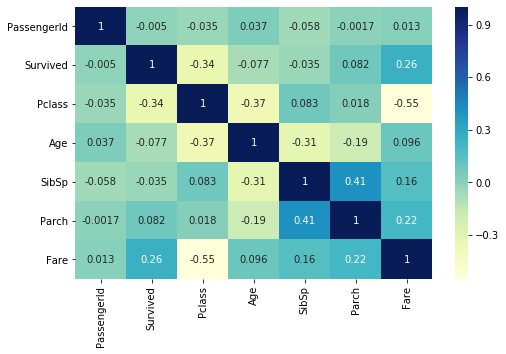

In [287]:
plt.subplots(figsize=(8, 5))
sns.heatmap(trainingData.corr(), annot=True,cmap="YlGnBu")
plt.show()

### Missing Values

In [288]:
trainingData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

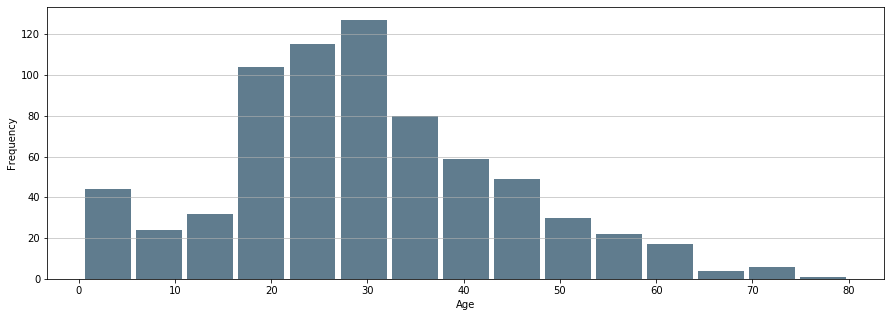

In [289]:
#distribution of Age

trainingData["Age"].plot.hist(bins=15, rwidth=0.9, color='#607c8e')
plt.xlabel('Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [290]:
#To fill the missing values, calculating the Mean and median

mean = trainingData["Age"].mean(skipna=True)
median = trainingData["Age"].median(skipna=True)

print("Mean of Age is:",mean)
print("Median of Age is: ",median)

Mean of Age is: 29.69911764705882
Median of Age is:  28.0


##### Since the above histogram looks skewed towards right, considering the median to imputing the missing values.

In [291]:
trainingData["Age"].fillna(median, inplace=True)

In [292]:
trainingData["Age"].isnull().sum()

0

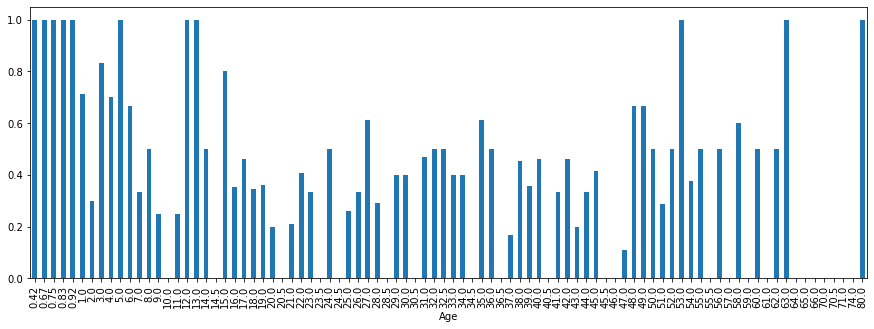

In [293]:
trainingData.groupby("Age")["Survived"].mean().plot.bar()

In [294]:
#As seen in the above plot,minors had more chance of survival. Creating a seperate variable for that.

trainingData["isMinor"] = np.where(trainingData["Age"]<=16,1,0)

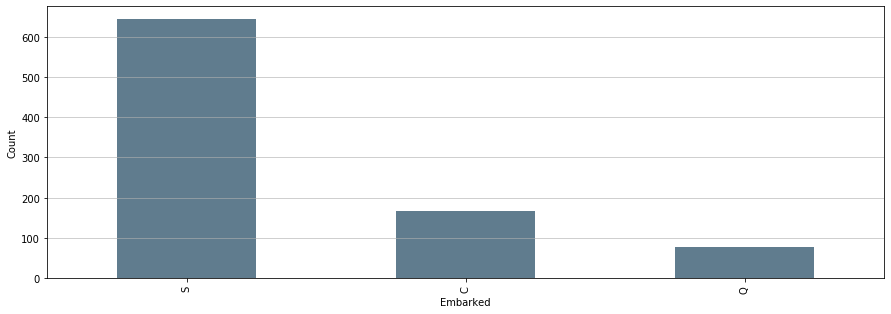

In [295]:
#distribution of embarked

trainingData["Embarked"].value_counts().plot.bar(color='#607c8e')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

##### Since the majority of people embarked from 's', replcaing the two missing values with 'S'

In [296]:
trainingData["Embarked"].fillna('S', inplace = True)

In [297]:
trainingData["Embarked"].isnull().sum()

0

##### Since the majority of data is missing in Cabin column, dropping the column

In [298]:
trainingData.drop('Cabin', axis=1, inplace=True)

In [299]:
trainingData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
isMinor        0
dtype: int64

###### As both SibSp abd Parch tell if the person was accompanied by a family member, converting both to single variable

In [300]:
trainingData['withFamily'] = np.where((trainingData['SibSp']==1) | (trainingData['Parch']==1),1,0)

In [301]:
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isMinor,withFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


In [302]:
#dropping unrequired columns
trainingData.drop('SibSp', axis=1, inplace=True)
trainingData.drop('Parch', axis=1, inplace=True)
trainingData.drop('Name', axis=1, inplace=True)
trainingData.drop('Ticket', axis=1, inplace=True)
trainingData.drop('Fare', axis=1, inplace=True)
trainingData.drop('PassengerId', axis=1, inplace=True)

In [303]:
trainingData.head()

,Survived,Pclass,Sex,Age,Embarked,isMinor,withFamily
0,0,3,male,22.0,S,0,1
1,1,1,female,38.0,C,0,1
2,1,3,female,26.0,S,0,0
3,1,1,female,35.0,S,0,1
4,0,3,male,35.0,S,0,0


In [304]:
#Encoding Sex variable with 0 for male and 1 for Female

#trainingData['Sex'] = np.where(trainingData['Sex']=="male",0,1)



In [305]:
trainingData = pd.get_dummies(trainingData, columns=['Pclass','Sex','Embarked',],drop_first=True)

In [306]:
trainingData.head()

,Survived,Age,isMinor,withFamily,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,0,1,0,1,1,0,1
1,1,38.0,0,1,0,0,0,0,0
2,1,26.0,0,0,0,1,0,0,1
3,1,35.0,0,1,0,0,0,0,1
4,0,35.0,0,0,0,1,1,0,1


In [307]:
#Performing the same changes in test data

testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [308]:
medianTestDataAge = testData['Age'].median(skipna=True)

testData['Age'].fillna(medianTestDataAge,inplace=True)

In [309]:
testData.drop('Cabin', axis=1, inplace=True)

In [310]:
testData['withFamily'] = np.where((testData['SibSp']==1) | (testData['Parch']==1),1,0)
testData.drop('SibSp', axis=1, inplace=True)
testData.drop('Parch', axis=1, inplace=True)
testData.drop('Name', axis=1, inplace=True)
testData.drop('Ticket', axis=1, inplace=True)
testData.drop('Fare', axis=1, inplace=True)
testData.drop('PassengerId', axis=1, inplace=True)

In [311]:
testData.head()

,Pclass,Sex,Age,Embarked,withFamily
0,3,male,34.5,Q,0
1,3,female,47.0,S,1
2,2,male,62.0,Q,0
3,3,male,27.0,S,0
4,3,female,22.0,S,1


In [312]:
testData = pd.get_dummies(testData, columns=['Pclass','Sex','Embarked'],drop_first=True)

In [313]:
testData.head()

,Age,withFamily,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,1,1,1,0
1,47.0,1,0,1,0,0,1
2,62.0,0,1,0,1,1,0
3,27.0,0,0,1,1,0,1
4,22.0,1,0,1,0,0,1


#### Model Building

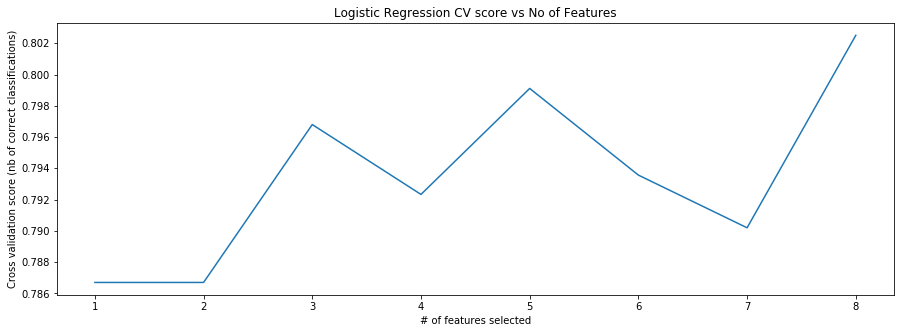

In [317]:
#Feature Selection
from sklearn.feature_selection import RFECV
reg = LogisticRegression()

indVar = ["Age","withFamily","isMinor","Pclass_2","Pclass_3","Embarked_Q","Embarked_S","Sex_male"]

predictors=trainingData[indVar]
y=trainingData["Survived"]

rfecv = RFECV(estimator=reg, step=1, cv=10, scoring='accuracy')
rfecv.fit(predictors, y)


plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("# of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


###### Selecting all 8 features seem to be the most optimum

In [319]:
reg.fit(predictors, y)
trainAccuracy = reg.score(predictors, y)
trainAccuracy = round(trainAccuracy*100, 2)
print(trainAccuracy)

80.25
